# 3장. 기초를 넘어서: 이미지에서 특징 감지하기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/aiml4coders/blob/main/ch03/03-1-fashion-mnist-with-cnn.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch03/03-1-fashion-mnist-with-cnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 합성곱 신경망 만들기

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [3]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 17s 5ms/step - loss: 0.4411 - accuracy: 0.8389
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2974 - accuracy: 0.8920
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2521 - accuracy: 0.9068
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2187 - accuracy: 0.9192
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1922 - accuracy: 0.9282
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1677 - accuracy: 0.9376
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1497 - accuracy: 0.9438
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1304 - accuracy: 0.9511
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1169 - accuracy: 0.9557
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.9899 - accuracy: 0.9018


[0.9898661971092224, 0.9017999768257141]

In [8]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[2.0591346e-31 3.3715014e-31 4.4534328e-30 1.2132897e-32 8.5501365e-36
 1.0622410e-19 2.5621736e-32 1.3762191e-22 0.0000000e+00 1.0000000e+00]
9


## 합성곱 신경망 살펴 보기

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## 말과 사람을 구별하는 CNN 만들기

### 케라스 ImageDataGenerator

In [10]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### 말-사람 데이터셋을 위한 CNN 구조

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)      

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
model.fit(train_generator, epochs=5)

Epoch 1/5
33/33 [==============================] - 38s 749ms/step - loss: 0.5418 - accuracy: 0.7176
Epoch 2/5
33/33 [==============================] - 10s 312ms/step - loss: 0.2233 - accuracy: 0.9085
Epoch 3/5
33/33 [==============================] - 10s 308ms/step - loss: 0.1904 - accuracy: 0.9279
Epoch 4/5
33/33 [==============================] - 10s 304ms/step - loss: 0.0792 - accuracy: 0.9747
Epoch 5/5
33/33 [==============================] - 10s 314ms/step - loss: 0.0848 - accuracy: 0.9805


### 검증 세트 추가하기

In [16]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [17]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [18]:
model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)

Epoch 1/5
33/33 [==============================] - 13s 390ms/step - loss: 0.1316 - accuracy: 0.9766 - val_loss: 3.9667 - val_accuracy: 0.7734
Epoch 2/5
33/33 [==============================] - 14s 432ms/step - loss: 0.1364 - accuracy: 0.9757 - val_loss: 3.0252 - val_accuracy: 0.8164
Epoch 3/5
33/33 [==============================] - 14s 420ms/step - loss: 0.0827 - accuracy: 0.9873 - val_loss: 3.5245 - val_accuracy: 0.7812
Epoch 4/5
33/33 [==============================] - 13s 390ms/step - loss: 0.0672 - accuracy: 0.9883 - val_loss: 2.3762 - val_accuracy: 0.8164
Epoch 5/5
33/33 [==============================] - 13s 382ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 2.8858 - val_accuracy: 0.8359


### 모델 실행하기

코랩을 사용하는 경우 아래 셀에서 직접 이미지를 업로드할 수 있습니다.

In [19]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    test_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
      import gdown
      base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
      for i in range(1,4):
        gdown.download(base_url + 'test_image_{}.jpg'.format(i))
      test_images = ['/content/test_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    test_images = ['test_image_{}.jpg'.format(i) for i in range(1,4)]

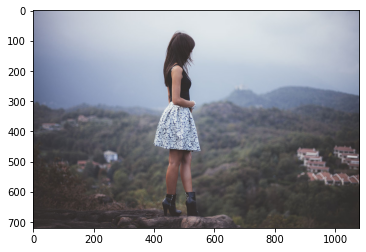

모델 출력: 1.0
test_image_1.jpg는 사람입니다.
--------------------


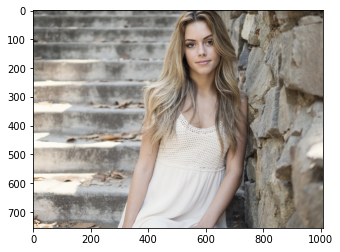

모델 출력: 7.3756884e-20
test_image_2.jpg는 말입니다.
--------------------


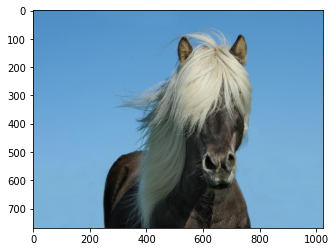

모델 출력: 0.0
test_image_3.jpg는 말입니다.
--------------------


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in test_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
      print(fn + "는 사람입니다.")
    else:
      print(fn + "는 말입니다.")
    print('--------------------')

## 이미지 증식

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [22]:
model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)

Epoch 1/5
33/33 [==============================] - 27s 809ms/step - loss: 0.5445 - accuracy: 0.7634 - val_loss: 0.5986 - val_accuracy: 0.7891
Epoch 2/5
33/33 [==============================] - 26s 799ms/step - loss: 0.4110 - accuracy: 0.8247 - val_loss: 3.0533 - val_accuracy: 0.6211
Epoch 3/5
33/33 [==============================] - 26s 800ms/step - loss: 0.3548 - accuracy: 0.8608 - val_loss: 0.7759 - val_accuracy: 0.7969
Epoch 4/5
33/33 [==============================] - 27s 801ms/step - loss: 0.3408 - accuracy: 0.8754 - val_loss: 2.5357 - val_accuracy: 0.6953
Epoch 5/5
33/33 [==============================] - 26s 793ms/step - loss: 0.2606 - accuracy: 0.8909 - val_loss: 1.9166 - val_accuracy: 0.7266


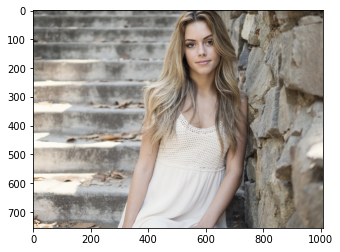

모델 출력: 1.0
test_image_2.jpg는 사람입니다.


In [23]:
fn = test_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = image.load_img(fn, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
  print(fn + "는 사람입니다.")
else:
  print(fn + "는 말입니다.")

## 전이 학습

In [24]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

In [25]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_7[0][0]']               
 alization)                                                                                       
                                                                                       

In [26]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층의 출력 크기: ', last_layer.output_shape)
last_output = last_layer.output

마지막 층의 출력 크기:  (None, 7, 7, 768)


In [27]:
# 출력을 펼쳐서 1차원으로 만듭니다.
x = layers.Flatten()(last_output)
# 1,204개 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
x = layers.Dense(1024, activation='relu')(x)
# 분류를 위해 시그모이드 함수를 사용하는 최종 층을 추가합니다.
x = layers.Dense(1, activation='sigmoid')(x)

In [28]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [29]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [30]:
model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)

Epoch 1/5
52/52 [==============================] - 98s 1s/step - loss: 0.1385 - acc: 0.9445 - val_loss: 0.0168 - val_acc: 0.9961
Epoch 2/5
52/52 [==============================] - 15s 283ms/step - loss: 0.0353 - acc: 0.9893 - val_loss: 0.0131 - val_acc: 0.9922
Epoch 3/5
52/52 [==============================] - 15s 293ms/step - loss: 0.0332 - acc: 0.9912 - val_loss: 0.0193 - val_acc: 0.9922
Epoch 4/5
52/52 [==============================] - 15s 292ms/step - loss: 0.0286 - acc: 0.9932 - val_loss: 0.0264 - val_acc: 0.9883
Epoch 5/5
52/52 [==============================] - 15s 279ms/step - loss: 0.0435 - acc: 0.9893 - val_loss: 1.7158e-04 - val_acc: 1.0000


이어지는 코드는 dogs-vs-cats 데이터셋을 다운로드하여 훈련 세트와 테스트 세트로 나눕니다.

In [31]:
data_url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'
data_file_name = 'catsdogs.zip'
download_dir = './'
urllib.request.urlretrieve(data_url, data_file_name)
zip_ref = zipfile.ZipFile(data_file_name, 'r')
zip_ref.extractall(download_dir)
zip_ref.close()

In [32]:
import os

try:
    os.mkdir('./cats-v-dogs')
    os.mkdir('./cats-v-dogs/training')
    os.mkdir('./cats-v-dogs/testing')
    os.mkdir('./cats-v-dogs/training/cats')
    os.mkdir('./cats-v-dogs/training/dogs')
    os.mkdir('./cats-v-dogs/testing/cats')
    os.mkdir('./cats-v-dogs/testing/dogs')
except OSError:
    pass

In [33]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = './PetImages/Cat/'
TRAINING_CATS_DIR = './cats-v-dogs/training/cats/'
TESTING_CATS_DIR = './cats-v-dogs/testing/cats/'
DOG_SOURCE_DIR = './PetImages/Dog/'
TRAINING_DOGS_DIR = './cats-v-dogs/training/dogs/'
TESTING_DOGS_DIR = './cats-v-dogs/testing/dogs/'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [34]:
print(len(os.listdir('./cats-v-dogs/training/cats/')))
print(len(os.listdir('./cats-v-dogs/training/dogs/')))
print(len(os.listdir('./cats-v-dogs/testing/cats/')))
print(len(os.listdir('./cats-v-dogs/testing/dogs/')))

12373
12368
2371
2387


In [35]:
import shutil

shutil.rmtree('./PetImages')

훈련과 검증을 위한 제너레이터를 준비합니다.

In [36]:
TRAINING_DIR = "./cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=100,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = "./cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=100,
    class_mode='binary',
    target_size=(150, 150))

Found 24739 images belonging to 2 classes.
Found 4758 images belonging to 2 classes.


인셉션 모델을 기반으로 새로운 분류 모델을 정의합니다.

In [37]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(train_generator,
          validation_data=validation_generator,
          epochs=5)

Epoch 1/5
181/248 [====================>.........] - ETA: 2:18 - loss: 0.2552 - acc: 0.9044

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

248/248 [==============================] - 631s 2s/step - loss: 0.2292 - acc: 0.9127 - val_loss: 0.0938 - val_acc: 0.9662
Epoch 2/5
248/248 [==============================] - 284s 1s/step - loss: 0.1493 - acc: 0.9379 - val_loss: 0.0821 - val_acc: 0.9695
Epoch 3/5
248/248 [==============================] - 278s 1s/step - loss: 0.1397 - acc: 0.9443 - val_loss: 0.0671 - val_acc: 0.9760
Epoch 4/5
248/248 [==============================] - 280s 1s/step - loss: 0.1309 - acc: 0.9492 - val_loss: 0.0689 - val_acc: 0.9754
Epoch 5/5
248/248 [==============================] - 283s 1s/step - loss: 0.1287 - acc: 0.9513 - val_loss: 0.0639 - val_acc: 0.9777


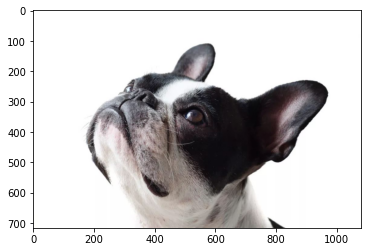

모델 출력: 1.0
cat-v-dogs-1.jpg는 강아지입니다.
--------------------


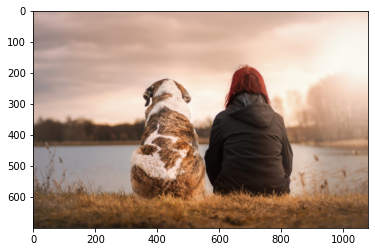

모델 출력: 1.0
cat-v-dogs-2.jpg는 강아지입니다.
--------------------


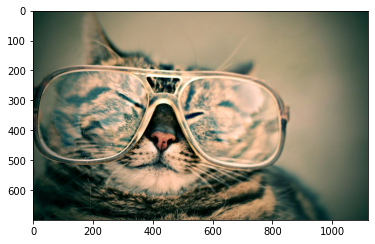

모델 출력: 1.0
cat-v-dogs-3.jpg는 강아지입니다.
--------------------


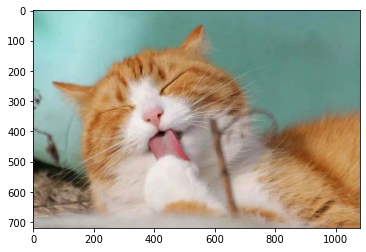

모델 출력: 1.0
cat-v-dogs-4.jpg는 강아지입니다.
--------------------


In [38]:
test_images = ['cat-v-dogs-{}.jpg'.format(i) for i in range(1,5)]

for fn in test_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
      print(fn + "는 강아지입니다.")
    else:
      print(fn + "는 고양이입니다.")
    print('--------------------')

## 다중 분류

In [39]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O ./rps.zip

--2022-02-26 03:44:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.207.80, 142.250.204.144, 142.250.199.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.207.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./rps.zip’

./rps.zip           100%[===================>] 191.38M  5.87MB/s    in 21s     

2022-02-26 03:44:59 (8.95 MB/s) - ‘./rps.zip’ saved [200682221/200682221]



In [40]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O ./rps-test-set.zip

--2022-02-26 03:45:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.204.112, 142.250.66.144, 142.250.204.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.204.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./rps-test-set.zip’

./rps-test-set.zip  100%[===================>]  28.15M  11.0MB/s    in 2.6s    

2022-02-26 03:45:04 (11.0 MB/s) - ‘./rps-test-set.zip’ saved [29516758/29516758]



In [41]:
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

TRAINING_DIR = "./rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [43]:
model = tf.keras.models.Sequential([
    # 입력 크기는 원하는 이미지(150x150, 3채널)와 맞아야 합니다.
    # 첫 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 두 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 세 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 네 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 밀집 층에 전달하가 위해 펼칩니다.
    tf.keras.layers.Flatten(),
    # 512개 뉴런을 가진 은닉층
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [45]:
model.fit(train_generator, 
          epochs=5, 
          validation_data=validation_generator)

Epoch 1/5
79/79 [==============================] - 61s 621ms/step - loss: 1.2117 - accuracy: 0.3905 - val_loss: 0.9948 - val_accuracy: 0.7984
Epoch 2/5
79/79 [==============================] - 30s 377ms/step - loss: 0.8746 - accuracy: 0.5988 - val_loss: 0.3525 - val_accuracy: 0.8360
Epoch 3/5
79/79 [==============================] - 29s 368ms/step - loss: 0.5352 - accuracy: 0.7774 - val_loss: 0.3271 - val_accuracy: 0.7903
Epoch 4/5
79/79 [==============================] - 29s 363ms/step - loss: 0.3386 - accuracy: 0.8623 - val_loss: 0.0556 - val_accuracy: 0.9973
Epoch 5/5
79/79 [==============================] - 29s 368ms/step - loss: 0.2436 - accuracy: 0.9139 - val_loss: 0.1038 - val_accuracy: 0.9597


In [46]:
# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    test_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'rsp_image_{}.jpg'.format(i))
        test_images = ['/content/rsp_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    test_images = ['rsp_image_{}.jpg'.format(i) for i in range(1,4)]

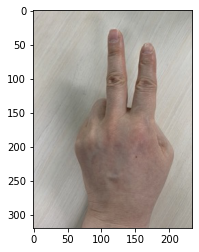

rsp_image_1.jpg는 가위입니다.


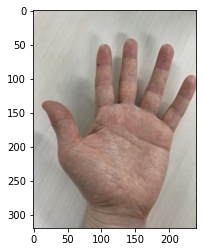

rsp_image_2.jpg는 보입니다.


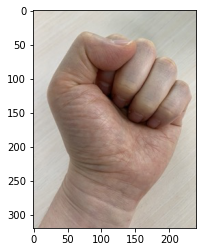

rsp_image_3.jpg는 바위입니다.


In [49]:
rsp_name = ['보', '바위', '가위']

for fn in test_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    idx = np.argmax(classes[0])
    print(fn + "는 {}입니다.".format(rsp_name[idx]))

## 드롭아웃 규제

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

model.evaluate(test_images, test_labels)